![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

import re

from itertools import combinations
from scipy.stats import ttest_ind

import warnings
import random

warnings.simplefilter('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from scipy.stats import rankdata

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

# Добавим метод чтобы красиво отобржать текст
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))

In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
#DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
33331,id_192,Paris,"['French', 'European', 'Vegetarian Friendly']",193.0,$$ - $$$,372.0,"[['High prize high quality', 'Great atmosphere...",/Restaurant_Review-g187147-d2093366-Reviews-Le...,d2093366,1,4.5
7493,id_7493,Oporto,NaN,1083.0,NaN,20.0,"[['Not worth the trip', 'Great decor.. Terribl...",/Restaurant_Review-g189180-d9836739-Reviews-Ch...,d9836739,0,0.0
36509,id_1313,Barcelona,"['Mediterranean', 'European', 'Spanish', 'Vege...",1314.0,$$ - $$$,296.0,[['Cozy corner restaurant with very good food'...,/Restaurant_Review-g187497-d986378-Reviews-Res...,d986378,1,4.0
20132,id_717,Vienna,"['European', 'Portuguese']",718.0,$,27.0,"[['DELICIA', 'alright'], ['04/16/2017', '10/12...",/Restaurant_Review-g190454-d8097289-Reviews-Na...,d8097289,1,4.5
30763,id_2568,Milan,"['Japanese', 'Sushi']",2570.0,$$ - $$$,254.0,"[['Good but poor menu', 'Very bad sushi'], ['0...",/Restaurant_Review-g187849-d2080659-Reviews-Ta...,d2080659,1,3.5


In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# ***Определяем полезные функции***:

In [15]:
#Положительные слова в отзывах ресторанов
def good_words(scroll):
    
    i = 0
    for word in scroll:
        for mood in key_words:
            if mood == word.lower():
                i += 1
    return i

#Вывод основных статистических данных категориальных признаков
def categorical_data_value(col):

    display(pd.DataFrame(food[col].value_counts()))
    display(food[col].describe())

# Построение гистограммы и вывод основных статистических данных цифровых признаков
def numerical_data_value(col):
    
    display(food[col].hist(bins=100))
    display(food[col].describe())

# Построение гистограммы цифровых признаков с выбросами, а также вывод границ выбросов
def numerical_hist(col, end):

    median = food[col].median()
    IQR = food[col].quantile(0.75) - food[col].quantile(0.25)
    perc25 = food[col].quantile(0.25)
    perc75 = food[col].quantile(0.75)
    l_side = perc25 - 1.5*IQR
    r_side = perc75 + 1.5*IQR
    print('25 percentile: {}'.format(perc25),
          '\n75 percentile: {}'.format(perc75),
          '\nData Outlier Boundaries:',
          '\nleft: {}'.format(l_side),
          '\nright: {}'.format(r_side))
    food[col].loc[food[col].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]\
        .hist(bins=100, range=(0, end), label='Значения')
    food[col].loc[food[col] >= r_side].hist(alpha=0.5, bins=100, range=(0, end),
                                        label='Выбросы')
    plt.legend()
    
# Нормализация признака
def normalise_col(column):

    scaler = MinMaxScaler()
    get_column = pd.DataFrame(food[column])
    get_column_norm = scaler.fit_transform(get_column)
    return get_column_norm

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Определим наличие и распределение NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [16]:
food = data.copy()

Приведем названия колонок к нормальному виду:

In [17]:
food.columns = [i.lower() for i in food.columns]
food.rename({'number of reviews': 'number_of_reviews', 
             'cuisine style' : 'cuisine_style',
            'price range': 'price_range'}, inplace=True, axis=1)
columns = food.columns.tolist()
columns

['restaurant_id',
 'city',
 'cuisine_style',
 'ranking',
 'price_range',
 'number_of_reviews',
 'reviews',
 'url_ta',
 'id_ta',
 'sample',
 'rating']

**Проверим датасет на наличие дубликатов**:

In [20]:
if len(food)>len(food.drop_duplicates()):
    print('Дубликаты есть')
    display(food[food.duplicated()])
else:
    print('Дубликатов нет')

Дубликатов нет


Посмотрим как распеделены пропуски по датасету:

<AxesSubplot:>

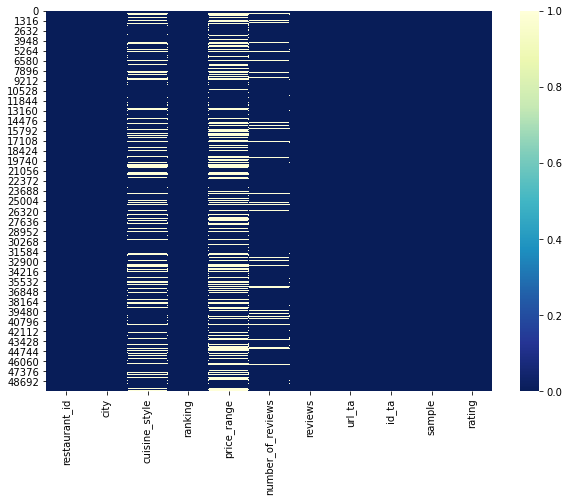

In [21]:
plt.figure(figsize=(10, 7))# размер тепловой карты
sns.heatmap(food.isnull(), cmap="YlGnBu_r")

Пропуски присутствуют в 3х переменных.

Добавим для будущей модели столбцы, где будет разметка искусственно заполненных данных.

In [18]:
cols_with_missing = ['price_range', 'cuisine_style', 'number_of_reviews']

for col in cols_with_missing:
    food[col + '_was_missing'] = food[col].isna()

food.head(3)

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,price_range_was_missing,cuisine_style_was_missing,number_of_reviews_was_missing
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,False,False,False
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,False,False,False
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,False,False,False


### 2. Обработка признаков и заполнение пропусков, EDA
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [19]:
food.nunique(dropna=False)

restaurant_id                    13094
city                                31
cuisine_style                    10732
ranking                          12975
price_range                          4
number_of_reviews                 1574
reviews                          41858
url_ta                           49963
id_ta                            49963
sample                               2
rating                              10
price_range_was_missing              2
cuisine_style_was_missing            2
number_of_reviews_was_missing        2
dtype: int64

## Price Range

In [20]:
food.price_range.unique()

array(['$$ - $$$', '$$$$', '$', nan], dtype=object)

По описанию 'Price Range' это - Цены в ресторане. Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами: 1,2,3.

In [21]:
def Price_Range(x):
    if x == '$':
        return 1
    elif x == '$$ - $$$':
        return 2
    elif x == '$$$$':
        return 3
    else:
        return np.nan


food['price_range'] = food['price_range'].apply(Price_Range)

Посмотрим на распределение модальных значений переменной.

In [22]:
food.groupby(['city'])['price_range'].agg(pd.Series.mode).value_counts()


2.0    31
Name: price_range, dtype: int64

Поскольку во всех городах модальный ценовой диапозон одинаковый, пропуски можно заполнить модальным значением.

In [23]:
food['price_range'] = food['price_range'].fillna(food['price_range'].mode()[0])

food.head()

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,price_range_was_missing,cuisine_style_was_missing,number_of_reviews_was_missing
0,id_0,Paris,"['Bar', 'Pub']",12963.0,2.0,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,False,False,False
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,2.0,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,False,False,False
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,2.0,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,False,False,False
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,3.0,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,False,False,False
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,3.0,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,False,False,False


In [24]:
food.price_range.isnull().sum()

0

Добавим переменную соотношение цен в ресторане и средней цены

In [25]:
food['price_top'] = food['price_range']/food['price_range'].mode()[0]

## number_of_reviews

In [26]:
categorical_data_value('number_of_reviews')

,number_of_reviews
2.0,2403
3.0,2042
4.0,1707
5.0,1471
6.0,1258
...,...
5216.0,1
1932.0,1
1050.0,1
1145.0,1


count    46800.000000
mean       124.471197
std        294.114345
min          2.000000
25%          9.000000
50%         33.000000
75%        115.000000
max       9660.000000
Name: number_of_reviews, dtype: float64

Распределение показывает большой разброс значений переменной, посмотрим на него подробнее. 

25 percentile: 9.0 
75 percentile: 115.0 
Data Outlier Boundaries: 
left: -150.0 
right: 274.0


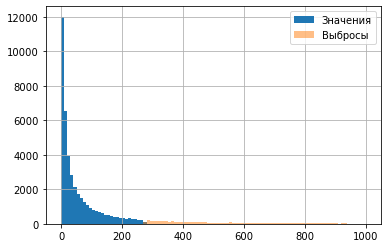

In [27]:
numerical_hist('number_of_reviews', 1000)

Логарифмируем значение

In [28]:
food['number_of_reviews_log'] = np.log(food['number_of_reviews'] + 1)

median = food['number_of_reviews_log'].median()
IQR = food['number_of_reviews_log'].quantile(0.75) - food['number_of_reviews_log'].quantile(0.25)
perc25 = food['number_of_reviews_log'].quantile(0.25)
perc75 = food['number_of_reviews_log'].quantile(0.75)
l_side = perc25 - 1.5*IQR
r_side = perc75 + 1.5*IQR
print('25 percentile: {}'.format(perc25),
          '\n75 percentile: {}'.format(perc75),
          '\nData Outlier Boundaries:',
          '\nleft: {}'.format(l_side),
          '\nright: {}'.format(r_side))

25 percentile: 2.302585092994046 
75 percentile: 4.7535901911063645 
Data Outlier Boundaries: 
left: -1.373922554174432 
right: 8.430097838274843


In [29]:
categorical_data_value('number_of_reviews_log')

,number_of_reviews_log
1.098612,2403
1.386294,2042
1.609438,1707
1.791759,1471
1.945910,1258
...,...
8.426831,1
7.247793,1
7.333023,1
7.414573,1


count    46800.000000
mean         3.600036
std          1.565696
min          1.098612
25%          2.302585
50%          3.526361
75%          4.753590
max          9.175852
Name: number_of_reviews_log, dtype: float64

In [30]:
a =  food[food['number_of_reviews_log'] > 8.430097838274843].number_of_reviews_log.value_counts().sum()
print(f' после логарифмирования осталовсь {a} выбросов')  

 после логарифмирования осталовсь 21 выбросов


In [31]:
food.number_of_reviews_log.mode().value_counts()

1.098612    1
dtype: int64

Заменим выбросы и отсутствующие значения модальным значением. Перед этим добавим информацию об изменения в датасет.

In [32]:
food['number_of_reviews_was_outliers'] = food['number_of_reviews_log'] >= 8.430097838274843 

In [33]:
def Number_of_reviews_log (x):
    if x > 8.430097838274843:
        return 1.098612
    elif x != x:
        return 1.098612
    else:
        return x
    
food['number_of_reviews_log'] = food['number_of_reviews_log'].apply(Number_of_reviews_log)

In [34]:
food.head(3)

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,price_range_was_missing,cuisine_style_was_missing,number_of_reviews_was_missing,price_top,number_of_reviews_log,number_of_reviews_was_outliers
0,id_0,Paris,"['Bar', 'Pub']",12963.0,2.0,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,False,False,False,1.0,1.609438,False
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,2.0,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,False,False,False,1.0,4.584967,False
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,2.0,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,False,False,False,1.0,3.367296,False


## city

In [35]:
categorical_data_value('city')

,city
London,7193
Paris,6108
Madrid,3813
Barcelona,3395
Berlin,2705
Milan,2694
Rome,2589
Prague,1816
Lisbon,1647
Vienna,1443


count      50000
unique        31
top       London
freq        7193
Name: city, dtype: object

Переменная "Города" является категориальной.   
Добавим информацию о наслении

In [36]:
population = {
    'London' : 8909081,
    'Paris' : 2148271,
    'Madrid' : 3223334,
    'Barcelona' : 1620343,
    'Berlin' : 3769495,
    'Milan' : 1399860,
    'Rome' : 2860009,
    'Prague' : 1324277,
    'Lisbon' : 505526,
    'Vienna' : 2600000,
    'Amsterdam' : 872680,
    'Brussels' : 1208542,
    'Hamburg' : 1845229,
    'Munich' : 1484226,
    'Lyon' : 516092,
    'Stockholm' : 975904,
    'Budapest' : 1752286,
    'Warsaw' : 1793579,
    'Dublin' : 554554,
    'Copenhagen' : 794128,
    'Athens' : 664046,
    'Edinburgh' : 488050, 
    'Zurich' : 415215,
    'Oporto' : 287591,
    'Geneva' : 201818, 
    'Krakow' : 779115, 
    'Oslo' : 697549, 
    'Helsinki' : 656229,
    'Bratislava' : 437726,
    'Luxembourg' : 626108,
    'Ljubljana' : 295504
}

food['population'] = food.city.map(population)

Добавим фильтр по столицам

In [37]:
capital = ['London', 'Paris', 'Madrid', 'Berlin', 'Rome', 'Prague',
          'Lisbon', 'Vienna', 'Amsterdam', 'Brussels', 'Stockholm',
          'Budapest', 'Warsaw', 'Dublin', 'Copenhagen', 'Athens',
          'Edinburgh', 'Oslo', 'Helsinki', 'Bratislava',
          'Luxembourg', 'Ljubljana']
food['is_capital'] = food.city.apply(lambda x: 1 if x in capital else 0)

Добавим информацию о покупательной способности населения

In [38]:
purchasing_power_index = {
    'London' : 24,
    'Paris' : 22,
    'Madrid' : 23,
    'Barcelona' : 30,
    'Berlin' : 8,
    'Milan' : 40,
    'Rome' : 37,
    'Prague' : 31,
    'Lisbon' : 48,
    'Vienna' : 21,
    'Amsterdam' : 19,
    'Brussels' : 15,
    'Hamburg' : 7,
    'Munich' : 6,
    'Lyon' : 70,
    'Stockholm' : 13,
    'Budapest' : 51,
    'Warsaw' : 29,
    'Dublin' : 27,
    'Copenhagen' : 10,
    'Athens' : 53,
    'Edinburgh' : 16, 
    'Zurich' : 2,
    'Oporto' : 42,
    'Geneva' : 3, 
    'Krakow' : 36, 
    'Oslo' : 17, 
    'Helsinki' : 9,
    'Bratislava' : 39,
    'Luxembourg' : 4,
    'Ljubljana' : 32
}

food['purchasing_power'] = food.city.map(purchasing_power_index)

Добавим нормированный столбец соотношения количества отзывов на 1 человека

In [39]:
food['reviews_per_population'] = food.number_of_reviews_log / food.population

food['reviews_per_population'].isnull().sum()

0

In [40]:
rangs_rpp = food['reviews_per_population'].values
rang_rpp_matrix = np.reshape(rangs_rpp, (-1, 1))
scaler = MinMaxScaler()
food['reviews_per_population'] = scaler.fit_transform(rang_rpp_matrix)


Добавим метрику соотношения покупательской способности и ценовой категории ресторана.

In [41]:
food['purchasing_power_rating'] = food['purchasing_power']/food['price_range'] 

In [42]:
rangs_ppr = food['purchasing_power_rating'].values
rang_ppr_matrix = np.reshape(rangs_ppr, (-1, 1))
scaler = MinMaxScaler()
food['purchasing_power_rating'] = scaler.fit_transform(rang_ppr_matrix)

## cuisine_style
Категориальный признак

Если в ресторане не заполнена информация о типах кухни, которую готовят, можно предположить, что в этом ресторане только местная кухня. По-этому заменили ее константой Local.

In [53]:
food['cuisine_style'] = food['cuisine_style'].fillna("['local']")


Для начала привидем данные в столбце Cuisine Style к нормальному виду

In [55]:
food['cuisine_style'] = food['cuisine_style'].apply(lambda x: eval(x))


TypeError: eval() arg 1 must be a string, bytes or code object

Добавим переменную с количеством типов кухонь.

In [57]:
food['len_cuisines'] = food['cuisine_style'].apply(lambda x: len(x))
display(food)

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,price_range_was_missing,cuisine_style_was_missing,number_of_reviews_was_missing,price_top,number_of_reviews_log,number_of_reviews_was_outliers,population,is_capital,purchasing_power,reviews_per_population,purchasing_power_rating,len_cuisines,Afghani,African,...,South American,Southwestern,Spanish,Sri Lankan,Steakhouse,Street Food,Sushi,Swedish,Swiss,Taiwanese,Thai,Tibetan,Tunisian,Turkish,Ukrainian,Uzbek,Vegan Options,Vegetarian Friendly,Venezuelan,Vietnamese,Welsh,Wine Bar,Xinjiang,Yunnan,local
0,id_0,Paris,"[Bar, Pub]",12963.0,2.0,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,False,False,False,1.0,1.609438,False,2148271,1,22,0.017142,0.149038,2,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",106.0,2.0,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,False,False,False,1.0,4.584967,False,656229,1,9,0.187990,0.055288,5,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
2,id_2,Edinburgh,[Vegetarian Friendly],810.0,2.0,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,False,False,False,1.0,3.367296,False,488050,1,16,0.185598,0.105769,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,id_3,London,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,3.0,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,False,False,False,1.5,5.313206,False,8909081,1,24,0.012957,0.105769,5,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,id_4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,3.0,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,False,False,False,1.5,5.093750,False,437726,1,39,0.315353,0.177885,6,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,2.0,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5,False,False,False,1.0,4.382027,False,1399860,0,40,0.082361,0.278846,4,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
49996,id_6340,Paris,"[French, American, Bar, European, Vegetarian F...",6341.0,2.0,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5,False,False,False,1.0,6.297109,False,2148271,1,22,0.076909,0.149038,5,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
49997,id_1649,Stockholm,"[Japanese, Sushi]",1652.0,2.0,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5,True,False,False,1.0,1.609438,False,975904,1,13,0.041793,0.084135,2,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49998,id_640,Warsaw,"[Polish, European, Eastern European, Central E...",641.0,2.0,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0,False,False,False,1.0,4.262680,False,1793579,1,29,0.061718,0.199519,5,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


Добавим дамми переменные по типам кухонь.

In [69]:
style = food['cuisine_style'].explode()
X = pd.get_dummies(style)
index_list = pd.Index.tolist(X.index)
Y = X.groupby(index_list).sum()
food = food.join(Y)
display(food)

ValueError: columns overlap but no suffix specified: Index(['Afghani', 'African', 'Albanian', 'American', 'Arabic', 'Argentinean',
       'Armenian', 'Asian', 'Australian', 'Austrian',
       ...
       'Uzbek', 'Vegan Options', 'Vegetarian Friendly', 'Venezuelan',
       'Vietnamese', 'Welsh', 'Wine Bar', 'Xinjiang', 'Yunnan', 'local'],
      dtype='object', length=126)

Добавим группировку по 2м наиболее распространненным группам кухонь.

In [58]:
list_style = food[['Afghani',
 'African',
 'Albanian',
 'American',
 'Arabic',
 'Argentinean',
 'Armenian',
 'Asian',
 'Australian',
 'Austrian',
 'Azerbaijani',
 'Balti',
 'Bangladeshi',
 'Bar',
 'Barbecue',
 'Belgian',
 'Brazilian',
 'Brew Pub',
 'British',
 'Burmese',
 'Cafe',
 'Cajun & Creole',
 'Cambodian',
 'Canadian',
 'Caribbean',
 'Caucasian',
 'Central American',
 'Central Asian',
 'Central European',
 'Chilean',
 'Chinese',
 'Colombian',
 'Contemporary',
 'Croatian',
 'Cuban',
 'Czech',
 'Danish',
 'Delicatessen',
 'Diner',
 'Dutch',
 'Eastern European',
 'Ecuadorean',
 'Egyptian',
 'Ethiopian',
 'European',
 'Fast Food',
 'Filipino',
 'French',
 'Fujian',
 'Fusion',
 'Gastropub',
 'Georgian',
 'German',
 'Gluten Free Options',
 'Greek',
 'Grill',
 'Halal',
 'Hawaiian',
 'Healthy',
 'Hungarian',
 'Indian',
 'Indonesian',
 'International',
 'Irish',
 'Israeli',
 'Italian',
 'Jamaican',
 'Japanese',
 'Korean',
 'Kosher',
 'Latin',
 'Latvian',
 'Lebanese',
 'Malaysian',
 'Mediterranean',
 'Mexican',
 'Middle Eastern',
 'Minority Chinese',
 'Mongolian',
 'Moroccan',
 'Native American',
 'Nepali',
 'New Zealand',
 'Norwegian',
 'Pakistani',
 'Persian',
 'Peruvian',
 'Pizza',
 'Polish',
 'Polynesian',
 'Portuguese',
 'Pub',
 'Romanian',
 'Russian',
 'Salvadoran',
 'Scandinavian',
 'Scottish',
 'Seafood',
 'Singaporean',
 'Slovenian',
 'Soups',
 'South American',
 'Southwestern',
 'Spanish',
 'Sri Lankan',
 'Steakhouse',
 'Street Food',
 'Sushi',
 'Swedish',
 'Swiss',
 'Taiwanese',
 'Thai',
 'Tibetan',
 'Tunisian',
 'Turkish',
 'Ukrainian',
 'Uzbek',
 'Vegan Options',
 'Vegetarian Friendly',
 'Venezuelan',
 'Vietnamese',
 'Welsh',
 'Wine Bar',
 'Xinjiang',
 'Yunnan',
 'local']].sum()

In [59]:
list_top = list_style[list_style > 10000]
list_top

European               12561
Vegetarian Friendly    14021
local                  11590
dtype: int64

In [60]:
List_medium = list_style[list_style.between(5000, 10000)]
List_medium

Gluten Free Options    5185
Italian                7433
Mediterranean          7820
Vegan Options          5684
dtype: int64

In [61]:
food['top_style_1'] = food['European'] + food['Vegetarian Friendly']
food['top_style_2'] = food['Italian'] + food['Mediterranean'] + food['local']
food.head(3)

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,price_range_was_missing,cuisine_style_was_missing,number_of_reviews_was_missing,price_top,number_of_reviews_log,number_of_reviews_was_outliers,population,is_capital,purchasing_power,reviews_per_population,purchasing_power_rating,len_cuisines,Afghani,African,...,Spanish,Sri Lankan,Steakhouse,Street Food,Sushi,Swedish,Swiss,Taiwanese,Thai,Tibetan,Tunisian,Turkish,Ukrainian,Uzbek,Vegan Options,Vegetarian Friendly,Venezuelan,Vietnamese,Welsh,Wine Bar,Xinjiang,Yunnan,local,top_style_1,top_style_2
0,id_0,Paris,"[Bar, Pub]",12963.0,2.0,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,False,False,False,1.0,1.609438,False,2148271,1,22,0.017142,0.149038,2,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",106.0,2.0,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,False,False,False,1.0,4.584967,False,656229,1,9,0.187990,0.055288,5,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,2,0
2,id_2,Edinburgh,[Vegetarian Friendly],810.0,2.0,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,False,False,False,1.0,3.367296,False,488050,1,16,0.185598,0.105769,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


## Ranking

Что бы легче было оценить признак Ranking, нормируем его относительно максимального значения в датасете.

In [62]:
food['ranking'] = food.groupby('city')['ranking'].apply(lambda x: x/x.max())

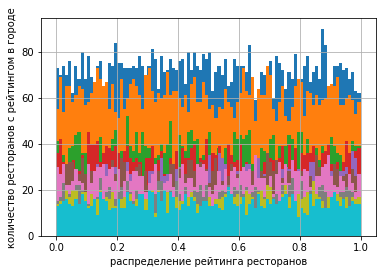

In [63]:
for x in (food['city'].value_counts())[0:10].index:
    food['ranking'][food['city'] == x].hist(bins=100)
plt.ylabel('количество ресторанов с рейтингом в городе')
plt.xlabel('распределение рейтинга ресторанов')
plt.show()

Рестораны с различным рейтингом равномерно распрпделены в различных городах. Чем крупнее город, тем больше ресторанов в каждой шкале рейтинга.  
Добавим переменные со средним, максимальным и минимальным рангами ресторана по городу.

In [64]:
ranking_mean_per_city = food.groupby('city')['ranking'].mean()
food['rating_mean_per_city'] = food.city.map(ranking_mean_per_city)

In [65]:
rank_city_min = food.groupby(['city'])['ranking'].min().to_dict()
rank_city_max = food.groupby(['city'])['ranking'].max().to_dict()
food['rank_city_min'] = food.city.map(rank_city_min)
food['rank_city_max'] = food.city.map(rank_city_max)
food['rank_norm'] = food.apply(lambda x: (
    x['ranking'] - x['rank_city_min'])/(x['rank_city_max'] - x['rank_city_min']), axis=1)

## reviews

#### Выделим даты из отзывов

In [66]:
pattern = re.compile('\'\d+\/\d+\/\d+\'?')
food['reviews_date'] = food['reviews'].apply(lambda x: pattern.findall(str(x)))

Очистим данные для анализа

In [67]:

food['reviews_date'] = food['reviews_date'].apply(
    lambda x: str(x).replace('[', '').replace("'", '').replace(']', '').replace(' ', '').replace('"', '').split(','))

food['fist_reviews'] = food['reviews_date'].apply(lambda x: x[0])
food['last_reviews'] = food['reviews_date'].apply(lambda x: x[-1])

food['fist_reviews'] = food['fist_reviews'].apply(
    lambda x: x.replace('[', '').replace("'", '').replace(']', '').replace(' ', '').replace('"', ''))
food['last_reviews'] = food['last_reviews'].apply(
    lambda x: x.replace('[', '').replace("'", '').replace(']', '').replace(' ', '').replace('"', ''))

Удалим вторую дату (дубликат первой), если отзыв был всего один

In [68]:
food['last_reviews'] = food['last_reviews'].apply(
    lambda x: '' if len(x) == 1 else x)
food.drop('reviews_date', axis=1, inplace=True)

Переведём данные в формат datetime.strptime для удобства дальнейшей работы

In [62]:
food['fist_reviews'] = food['fist_reviews'].apply(lambda x: x if len(
    x) == 0 else pd.to_datetime(x))
food['last_reviews'] = food['last_reviews'].apply(lambda x: x if len(
    x) == 0 else pd.to_datetime(x))

Cоздаём колонки, показывающие сколько дней назад были написаны отзывы. Точкой отсчета возьмем 01.01.2021 года.  
Если пропущены значения, то заменим на среднее

In [63]:
food['How_long_ago_1'] = pd.to_datetime('01/01/2021') - food['fist_reviews']
food['How_long_ago_2'] = pd.to_datetime('01/01/2021') - food['last_reviews']
food['How_long_ago_1'] = food['How_long_ago_1'].apply(lambda x: x.days)
food['How_long_ago_2'] = food['How_long_ago_2'].apply(lambda x: x.days)

food['How_long_ago_1'].fillna(
    round(food['How_long_ago_1'].mean()), inplace=True)
food['How_long_ago_2'].fillna(
    round(food['How_long_ago_2'].mean()), inplace=True)

Создаём колонку с разницей в датах отзывов

In [64]:
food['difference'] = abs(food['fist_reviews'] - food['last_reviews'])
food['fist_reviews'] = food['fist_reviews'].fillna(0)
food['last_reviews'] = food['last_reviews'].fillna(0)
food['difference'] = food['difference'].apply(lambda x: x.days)
food['difference'] = food['difference'].fillna(0)

заменим отсутствующие значения на модальные даты

In [65]:
food["fist_reviews"] = food["fist_reviews"].apply(
    lambda y: '2018-01-03' if y == 0 else y)

food["last_reviews"] = food["last_reviews"].apply(
    lambda y: '2018-01-07' if y == 0 else y)

Создаём колонки с днями недели отзывов и месяцы

In [66]:
food['Day_of_week_1'] = food['fist_reviews'].apply(
    lambda x: 0 if x == 0 else x.strftime('%w'))
food['Day_of_week_2'] = food['last_reviews'].apply(
    lambda x: 0 if x == 0 else x.strftime('%w'))
food['Month_1'] = food['fist_reviews'].apply(
    lambda x: 0 if x == 0 else x.strftime('%m'))
food['Month_2'] = food['last_reviews'].apply(
    lambda x: 0 if x == 0 else x.strftime('%m'))

Ранжируем столбцы с датами отзывов и столбец с днями между отзывами.

In [67]:
food['rang_last_reviews'] = rankdata(food.last_reviews, method='min')
food['rang_fist_reviews'] = rankdata(food.fist_reviews, method='min')

In [68]:
rangs = food['rang_last_reviews'].values
rang_matrix = np.reshape(rangs, (-1, 1))
scaler = MinMaxScaler()
food['rang_last_reviews'] = scaler.fit_transform(rang_matrix)

In [69]:
rangs_f = food['rang_fist_reviews'].values
rang_matrix_f = np.reshape(rangs_f, (-1, 1))
scaler = MinMaxScaler()
food['rang_fist_reviews'] = scaler.fit_transform(rang_matrix_f)

In [70]:
food['difference'] = rankdata(food.difference, method='min')

rangs_day = food['difference'].values
rang_matrix_day = np.reshape(rangs_day, (-1, 1))
scaler = MinMaxScaler()
food['difference'] = scaler.fit_transform(rang_matrix_day)
food.head(3)

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,price_range_was_missing,cuisine_style_was_missing,number_of_reviews_was_missing,price_top,number_of_reviews_log,number_of_reviews_was_outliers,population,is_capital,purchasing_power,reviews_per_population,purchasing_power_rating,len_cuisines,Afghani,African,...,Vegetarian Friendly,Venezuelan,Vietnamese,Welsh,Wine Bar,Xinjiang,Yunnan,local,top_style_1,top_style_2,rating_mean_per_city,rank_city_min,rank_city_max,rank_norm,fist_reviews,last_reviews,How_long_ago_1,How_long_ago_2,difference,Day_of_week_1,Day_of_week_2,Month_1,Month_2,rang_last_reviews,rang_fist_reviews
0,id_0,Paris,"[Bar, Pub]",0.926855,2.0,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,False,False,False,1.0,1.609438,False,2148271,1,22,0.017142,0.149038,2,0,0,...,0,0,0,0,0,0,0,0,0,0,0.496107,0.000215,1.0,0.926840,2018-01-03,2018-01-07,1338.0,1446.0,0.000000,3,0,01,01,0.820156,0.749190
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",0.092901,2.0,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,False,False,False,1.0,4.584967,False,656229,1,9,0.187990,0.055288,5,0,0,...,1,0,0,0,0,0,0,0,2,0,0.494506,0.003506,1.0,0.089710,2017-12-05,2017-10-29,1123.0,1160.0,0.535151,2,0,12,10,0.636093,0.624905
2,id_2,Edinburgh,[Vegetarian Friendly],0.458664,2.0,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,False,False,False,1.0,3.367296,False,488050,1,16,0.185598,0.105769,1,0,0,...,1,0,0,0,0,0,0,0,1,0,0.501206,0.000566,1.0,0.458357,2017-12-28,2017-12-06,1100.0,1122.0,0.464129,4,3,12,12,0.723994,0.708749


Удаляем больше ненужные колонки

In [71]:
food.drop('fist_reviews', axis=1, inplace=True)
food.drop('last_reviews', axis=1, inplace=True)

#### Поработаем с тональностью отзывов.   
Выделим слова, отвечающие за положительную тональность.

<AxesSubplot:>

count    50000.000000
mean         0.959120
std          0.975904
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: review_mood, dtype: float64

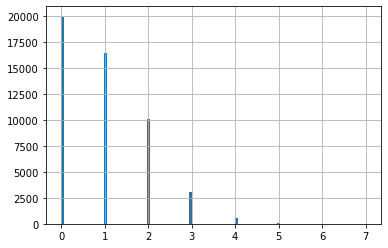

In [72]:
key_words = ['good','great','nice','best','excellent','but','delicious', 'friendly', 'lovely', 'amazing', 'tasty', 'little']
food['words'] = food.reviews.str.findall(r"(\w+)")
food['review_mood'] = food.words.dropna().apply(good_words)
food.review_mood.fillna(0, inplace=True)

numerical_data_value('review_mood')

In [73]:
food.head(3)

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating,price_range_was_missing,cuisine_style_was_missing,number_of_reviews_was_missing,price_top,number_of_reviews_log,number_of_reviews_was_outliers,population,is_capital,purchasing_power,reviews_per_population,purchasing_power_rating,len_cuisines,Afghani,African,...,Vegetarian Friendly,Venezuelan,Vietnamese,Welsh,Wine Bar,Xinjiang,Yunnan,local,top_style_1,top_style_2,rating_mean_per_city,rank_city_min,rank_city_max,rank_norm,How_long_ago_1,How_long_ago_2,difference,Day_of_week_1,Day_of_week_2,Month_1,Month_2,rang_last_reviews,rang_fist_reviews,words,review_mood
0,id_0,Paris,"[Bar, Pub]",0.926855,2.0,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,False,False,False,1.0,1.609438,False,2148271,1,22,0.017142,0.149038,2,0,0,...,0,0,0,0,0,0,0,0,0,0,0.496107,0.000215,1.0,0.926840,1338.0,1446.0,0.000000,3,0,01,01,0.820156,0.749190,[],0.0
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",0.092901,2.0,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,False,False,False,1.0,4.584967,False,656229,1,9,0.187990,0.055288,5,0,0,...,1,0,0,0,0,0,0,0,2,0,0.494506,0.003506,1.0,0.089710,1123.0,1160.0,0.535151,2,0,12,10,0.636093,0.624905,"[Very, good, reviews, Fine, dining, in, Hakani...",1.0
2,id_2,Edinburgh,[Vegetarian Friendly],0.458664,2.0,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,False,False,False,1.0,3.367296,False,488050,1,16,0.185598,0.105769,1,0,0,...,1,0,0,0,0,0,0,0,1,0,0.501206,0.000566,1.0,0.458357,1100.0,1122.0,0.464129,4,3,12,12,0.723994,0.708749,"[Better, than, the, Links, Ivy, Black, 12, 28,...",0.0


### Посмотрим распределение признака

<AxesSubplot:>

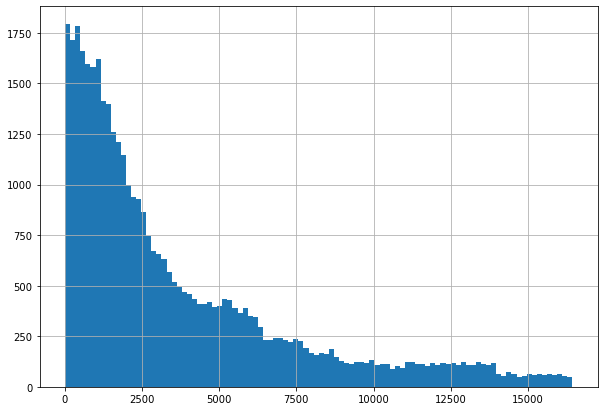

In [74]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

<AxesSubplot:>

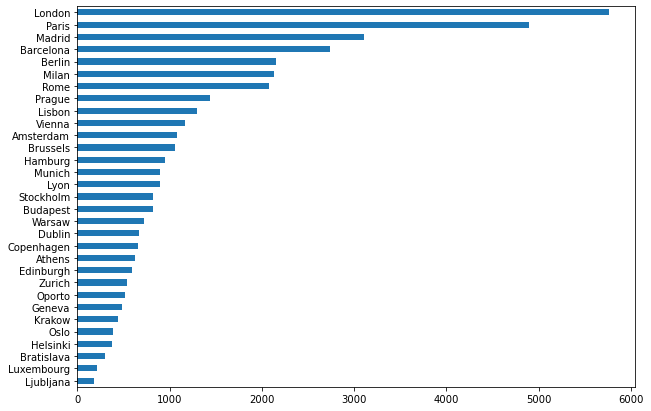

In [75]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

<AxesSubplot:>

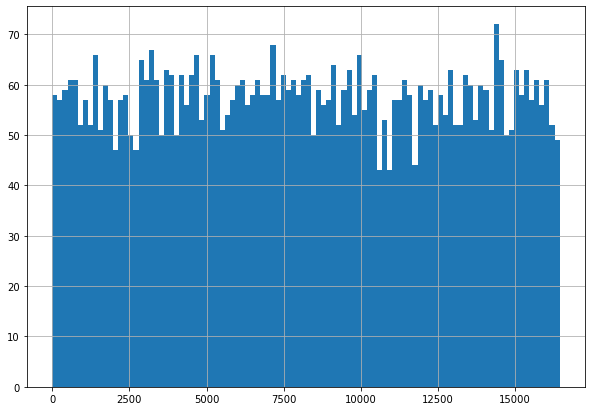

In [76]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

Добавим дамми переменные по городам.

In [77]:
food = pd.get_dummies(food, columns=['city', ], dummy_na=True)

### Посмотрим распределение целевой переменной

<AxesSubplot:>

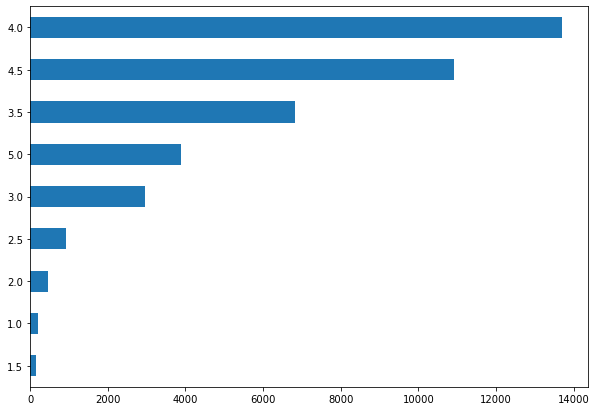

In [78]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

<AxesSubplot:>

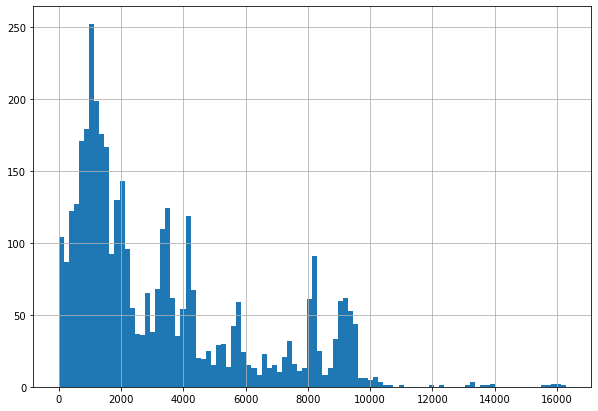

In [79]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

<AxesSubplot:>

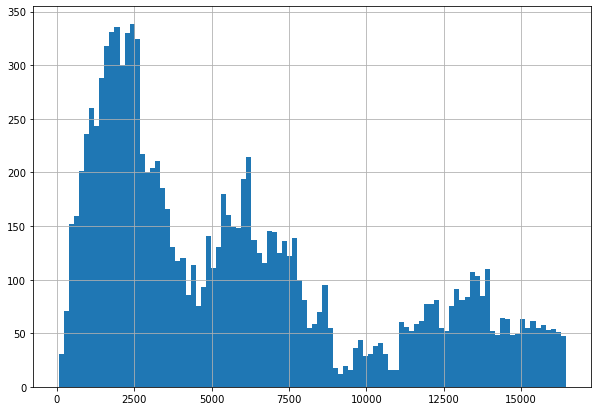

In [80]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

###  [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)


Эксперементальным путем переберем переменные для модели.

<AxesSubplot:>

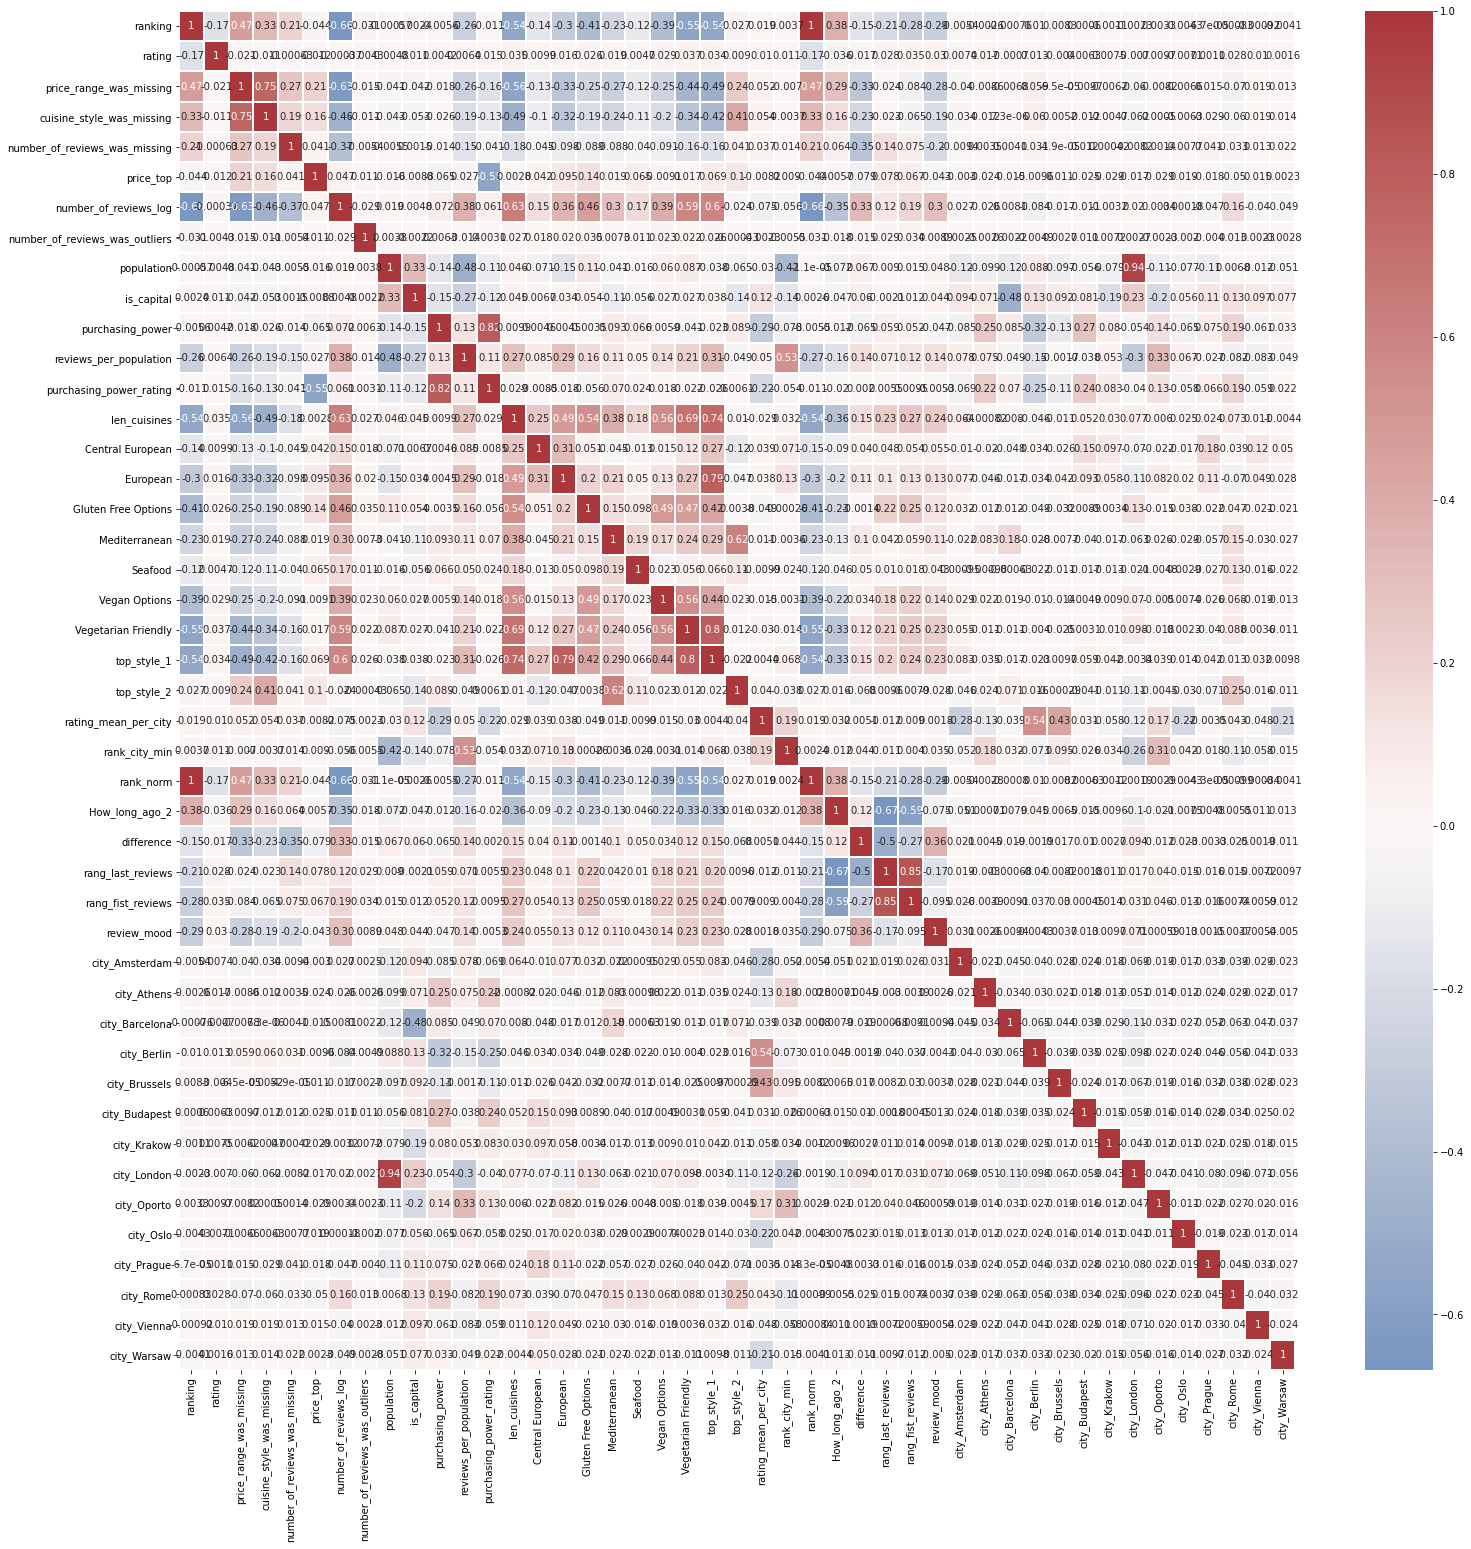

In [81]:
style_for_drop = [
'Afghani',
 'African',
 'Albanian',
 'American',
 'Arabic',
 'Argentinean',
 'Armenian',
 'Asian',
 'Australian',
 'Austrian',
 'Azerbaijani',
 'Balti',
 'Bangladeshi',
 'Bar',
 'Barbecue',
 'Belgian',
 'Brazilian',
 'Brew Pub',
 'British',
 'Burmese',
 'Cafe',
 'Cajun & Creole',
 'Cambodian',
 'Canadian',
 'Caribbean',
 'Caucasian',
 'Central American',
 'Central Asian',
 'Chilean',
 'Chinese',
 'Colombian',
 'Contemporary',
 'Croatian',
 'Cuban',
 'Czech',
 'Danish',
 'Delicatessen',
 'Diner',
 'Dutch',
 'Eastern European',
 'Ecuadorean',
 'Egyptian',
 'Ethiopian',
 'Fast Food',
 'Filipino',
 'French',
 'Fujian',
 'Fusion',
 'Gastropub',
 'Georgian',
 'German',
 'Greek',
 'Grill',
 'Halal',
 'Hawaiian',
 'Healthy',
 'Hungarian',
 'Indian',
 'Indonesian',
 'International',
 'Irish',
 'Israeli',
 'Italian',
 'Jamaican',
 'Japanese',
 'Korean',
 'Kosher',
 'Latin',
 'Latvian',
 'Lebanese',
 'Malaysian',
 'Mexican',
 'Middle Eastern',
 'Minority Chinese',
 'Mongolian',
 'Moroccan',
 'Native American',
 'Nepali',
 'New Zealand',
 'Norwegian',
 'Pakistani',
 'Persian',
 'Peruvian',
 'Pizza',
 'Polish',
 'Polynesian',
 'Portuguese',
 'Pub',
 'Romanian',
 'Russian',
 'Salvadoran',
 'Scandinavian',
 'Scottish',
 'Singaporean',
 'Slovenian',
 'Soups',
 'South American',
 'Southwestern',
 'Spanish',
 'Sri Lankan',
 'Steakhouse',
 'Street Food',
 'Sushi',
 'Swedish',
 'Swiss',
 'Taiwanese',
 'Thai',
 'Tibetan',
 'Tunisian',
 'Turkish',
 'Ukrainian',
 'Uzbek',
 'Venezuelan',
 'Vietnamese',
 'Welsh',
 'Wine Bar',
 'Xinjiang',
 'Yunnan',
 'local',
 'cuisine_style', 'url_ta', 'id_ta','words', 'reviews', 'price_range', 'How_long_ago_1', 'rank_city_max','city_nan', 
 'city_Bratislava',
 'city_Copenhagen',
 'city_Dublin',
 'city_Edinburgh',
 'city_Geneva',
 'city_Hamburg',
 'city_Lisbon',
 'city_Helsinki',
 'city_Ljubljana',
 'city_Luxembourg',
 'city_Lyon',
 'city_Madrid',
 'city_Milan',
 'city_Munich',
 'city_Paris',
 'city_Stockholm',
 'city_Zurich']

col_for_drop = ['sample', 'number_of_reviews']
food_corr = food.drop(style_for_drop, axis=1)
food_corr = food_corr.drop(col_for_drop, axis = 1)
#sns.heatmap(food_corr.corr())

correlation = food_corr.corr()
ax = plt.subplots(figsize=(25, 25))
sns.heatmap(correlation, annot=True, cmap='vlag', linewidths=1, center=0)

Построим переменные на основе данных матрицы корреляции

In [82]:
R = correlation

In [83]:
R.shape

(45, 45)

In [84]:
np.linalg.matrix_rank(R)

45

Матрица корреляции имеет размер 45*45 и максимальный ранг, что в случае отсутствия мультиколленеарности говорит о ее не вырожденности.
"На газ" мультиклленеарность так же отсутствует.

In [85]:
R.columns



Index(['ranking', 'rating', 'price_range_was_missing',
       'cuisine_style_was_missing', 'number_of_reviews_was_missing',
       'price_top', 'number_of_reviews_log', 'number_of_reviews_was_outliers',
       'population', 'is_capital', 'purchasing_power',
       'reviews_per_population', 'purchasing_power_rating', 'len_cuisines',
       'Central European', 'European', 'Gluten Free Options', 'Mediterranean',
       'Seafood', 'Vegan Options', 'Vegetarian Friendly', 'top_style_1',
       'top_style_2', 'rating_mean_per_city', 'rank_city_min', 'rank_norm',
       'How_long_ago_2', 'difference', 'rang_last_reviews',
       'rang_fist_reviews', 'review_mood', 'city_Amsterdam', 'city_Athens',
       'city_Barcelona', 'city_Berlin', 'city_Brussels', 'city_Budapest',
       'city_Krakow', 'city_London', 'city_Oporto', 'city_Oslo', 'city_Prague',
       'city_Rome', 'city_Vienna', 'city_Warsaw'],
      dtype='object')

In [86]:
top_popul = R['price_top']['population']
food['top_popul'] = food['price_top']/top_popul
#food['population_norm'] = normalise_col('population')
#food['popul_top_2'] = food['population_norm']*top_popul
#food.drop(['population_norm'], axis = 1, inplace=True)

In [87]:
#food['top_popul_2'] = food['price_top']*top_popul

Посеольку у целевой переменной высокая корреляция с признаком ranking, добавим переменные на основе корреляции с этим признаком.

In [88]:
rank_p_r_mis = R['ranking']['price_range_was_missing']
food['rank_p_r_mis'] = food['ranking']/rank_p_r_mis
food['p_r_mis_rank'] = food['price_range_was_missing']/rank_p_r_mis

In [89]:
food['rank_p_r_mis_2'] = food['ranking']*rank_p_r_mis

In [90]:
rank_number_mis = R['ranking']['number_of_reviews_was_missing']
food['rank_number_mis'] = food['ranking']/rank_number_mis

In [91]:
rank_number_log = R['ranking']['number_of_reviews_log']
food['number_log_rank'] = food['number_of_reviews_log']/rank_number_log

# Data Preprocessing


In [92]:
food.drop(['restaurant_id','number_of_reviews'], axis = 1, inplace=True)
food.drop(style_for_drop, axis = 1, inplace=True)

#### Запускаем и проверяем что получилось

In [93]:
df_preproc = food
df_preproc.sample(3)

,ranking,sample,rating,price_range_was_missing,cuisine_style_was_missing,number_of_reviews_was_missing,price_top,number_of_reviews_log,number_of_reviews_was_outliers,population,is_capital,purchasing_power,reviews_per_population,purchasing_power_rating,len_cuisines,Central European,European,Gluten Free Options,Mediterranean,Seafood,Vegan Options,Vegetarian Friendly,top_style_1,top_style_2,rating_mean_per_city,...,Month_1,Month_2,rang_last_reviews,rang_fist_reviews,review_mood,city_Amsterdam,city_Athens,city_Barcelona,city_Berlin,city_Brussels,city_Budapest,city_Krakow,city_London,city_Oporto,city_Oslo,city_Prague,city_Rome,city_Vienna,city_Warsaw,top_popul,rank_p_r_mis,p_r_mis_rank,rank_p_r_mis_2,rank_number_mis,number_log_rank
38990,0.763683,1,4.0,True,False,False,1.0,1.098612,False,8909081,1,24,8.874707e-10,0.163462,2,0,0,0,0,1,0,0,0,0,0.496820,...,12,08,0.089422,0.066054,2.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-64.201671,1.639009,2.14619,0.355832,3.642978,-1.668538
4268,0.067988,0,0.0,False,False,False,1.0,6.059123,False,8909081,1,24,1.525041e-02,0.163462,4,0,0,0,1,0,1,1,1,1,0.496820,...,12,12,0.776756,0.708749,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-64.201671,0.145916,0.00000,0.031679,0.324323,-9.202405
12489,0.266592,1,4.0,True,True,False,1.0,3.258097,False,437726,1,39,2.004908e-01,0.271635,1,0,0,0,0,0,0,0,0,1,0.520168,...,03,09,0.535571,0.216332,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-64.201671,0.572156,2.14619,0.124216,1.271716,-4.948294


In [94]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ranking                         50000 non-null  float64
 1   sample                          50000 non-null  int64  
 2   rating                          50000 non-null  float64
 3   price_range_was_missing         50000 non-null  bool   
 4   cuisine_style_was_missing       50000 non-null  bool   
 5   number_of_reviews_was_missing   50000 non-null  bool   
 6   price_top                       50000 non-null  float64
 7   number_of_reviews_log           50000 non-null  float64
 8   number_of_reviews_was_outliers  50000 non-null  bool   
 9   population                      50000 non-null  int64  
 10  is_capital                      50000 non-null  int64  
 11  purchasing_power                50000 non-null  int64  
 12  reviews_per_population          

In [95]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.rating.values            # наш таргет
X = train_data.drop(['rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [96]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [98]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape, y_train.shape

((10000, 55), (40000, 55), (40000, 54), (32000, 54), (8000, 54), (32000,))

# Model 
Сам ML

In [96]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [97]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [98]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [99]:
y_pred = (y_pred * 2).round()/2

In [100]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.1640625


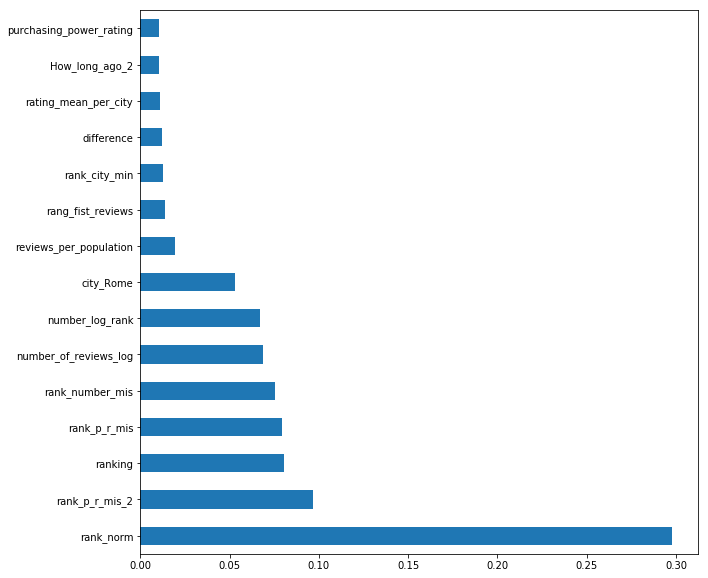

In [101]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [102]:
test_data.sample(10)

,ranking,rating,price_range_was_missing,cuisine_style_was_missing,number_of_reviews_was_missing,price_top,number_of_reviews_log,number_of_reviews_was_outliers,population,is_capital,purchasing_power,reviews_per_population,purchasing_power_rating,len_cuisines,Central European,European,Gluten Free Options,Mediterranean,Seafood,Vegan Options,Vegetarian Friendly,top_style_1,top_style_2,rating_mean_per_city,rank_city_min,...,Month_1,Month_2,rang_last_reviews,rang_fist_reviews,review_mood,city_Amsterdam,city_Athens,city_Barcelona,city_Berlin,city_Brussels,city_Budapest,city_Krakow,city_London,city_Oporto,city_Oslo,city_Prague,city_Rome,city_Vienna,city_Warsaw,top_popul,rank_p_r_mis,p_r_mis_rank,rank_p_r_mis_2,rank_number_mis,number_log_rank
6291,0.496047,0.0,True,True,False,1.0,1.386294,False,8909081,1,24,0.000884,0.163462,1,0,0,0,0,0,0,0,0,1,0.496820,0.000061,...,11,06,0.424568,0.532037,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-64.201671,1.064612,2.14619,0.231129,2.366282,-2.105460
6809,0.931217,0.0,True,True,False,1.0,2.484907,False,2148271,1,22,0.028304,0.149038,1,0,0,0,0,0,0,0,0,1,0.496107,0.000215,...,11,09,0.209144,0.547445,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-64.201671,1.998569,2.14619,0.433893,4.442163,-3.773998
8337,0.558845,0.0,False,False,False,1.0,2.833213,False,2148271,1,22,0.032745,0.149038,4,0,0,0,1,0,0,0,0,1,0.496107,0.000215,...,01,10,0.101002,0.074119,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-64.201671,1.199387,0.00000,0.260389,2.665843,-4.302995
1895,0.701133,0.0,True,True,False,1.0,1.386294,False,1845229,0,7,0.017200,0.040865,1,0,0,0,0,0,0,0,0,1,0.502525,0.000365,...,01,01,0.820156,0.749190,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-64.201671,1.504764,2.14619,0.326687,3.344597,-2.105460
6895,0.995702,0.0,True,True,True,1.0,1.098612,False,1324277,1,31,0.019345,0.213942,1,0,0,0,0,0,0,0,0,1,0.498324,0.000478,...,01,01,0.820156,0.749190,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-64.201671,2.136966,2.14619,0.463939,4.749774,-1.668537
1440,0.868779,0.0,True,False,False,1.0,1.098612,False,1620343,0,30,0.015193,0.206731,1,0,0,0,0,0,0,0,0,0,0.497617,0.000641,...,01,01,0.820156,0.749190,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-64.201671,1.864565,2.14619,0.404800,4.144316,-1.668538
5849,0.730925,0.0,True,True,False,1.0,2.302585,False,975904,1,13,0.061247,0.084135,1,0,0,0,0,0,0,0,0,1,0.502225,0.000406,...,01,01,0.820156,0.749190,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-64.201671,1.568705,2.14619,0.340569,3.486716,-3.497094
1354,0.695052,0.0,True,True,False,1.0,1.386294,False,2148271,1,22,0.014297,0.149038,1,0,0,0,0,0,0,0,0,1,0.496107,0.000215,...,08,07,0.184784,0.118522,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-64.201671,1.491714,2.14619,0.323854,3.315591,-2.105460
2656,0.652579,0.0,True,True,False,1.0,1.945910,False,1324277,1,31,0.036869,0.213942,1,0,0,0,0,0,0,0,0,1,0.498324,0.000478,...,10,10,0.101302,0.058731,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-64.201671,1.400558,2.14619,0.304064,3.112981,-2.955387
9104,0.549121,0.0,True,False,True,1.0,1.098612,False,3769495,1,8,0.004605,0.048077,3,0,0,0,0,0,0,0,0,0,0.510894,0.000314,...,09,09,0.535571,0.416757,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-64.201671,1.178519,2.14619,0.255859,2.619460,-1.668537


In [103]:
test_data = test_data.drop(['rating'], axis=1)

In [104]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [105]:
predict_submission = model.predict(test_data)
predict_submission = (predict_submission * 2).round()/2

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [106]:
predict_submission

array([3. , 4. , 4. , ..., 3. , 4.5, 4.5])

In [107]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.0
1,id_1,4.0
2,id_2,4.0
3,id_3,4.5
4,id_4,4.5
5,id_5,4.5
6,id_6,1.5
7,id_7,3.5
8,id_8,4.0
9,id_9,4.5


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
